In [225]:
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [226]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [227]:
sns.set_theme()

In [228]:
def plot_data(x):
    x = np.array(x)
    plt.scatter(x[:, 0], x[:, 1])
    plt.show()
    
def plot_clusters(x, clusters):
    x = np.array(x)
    df = pd.DataFrame(x, columns=['x', 'y'])
    df['cluster'] = clusters
    sns.scatterplot(data=df, x='x', y='y', hue='cluster')
    plt.show()

#### Data sample


In [229]:
x = [[1, 1], [1, 0], [0, 1], [0, 0], [0.5, 0.5], [0.5, 0.6], 
     [0.6, 0.5], [0.6, 0.6], [10, 10], [11, 11], [10.5, 10.5], 
     [15, 12], [15, 15], [15, 13], [20, 20], [0, 15]]

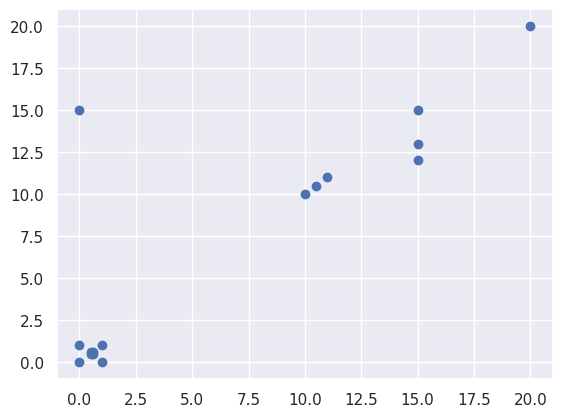

In [230]:
plot_data(x)

#### DBSCAN IMPLEMENTATION

In [231]:
class DBSCAN:
    def __init__(self, data, eps, min_samples):
        
        if not isinstance(data, np.ndarray):
            data = np.array(data)
        self.data = data
        self.eps = eps
        self.min_samples = min_samples
        self.neighbours = [self.get_neighbours(point) for point in self.data]
        self.core_points = [point_id for point_id, neighbours in enumerate(self.neighbours) if len(neighbours) >= self.min_samples]
        self.current_cluster = 1
        self.labels = [-1] * len(self.data)
        self.visited = [0] * len(self.data)
    
    def cal_euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def get_neighbours(self, point):
        neightbours = []
        for i in range(len(self.data)):
            if self.cal_euclidean_distance(self.data[i], point) <= self.eps:
                neightbours.append(i)
        return neightbours

    def assign_label(self, current_cluster, core_point, neighbours):
        self.visited[core_point] = 1
        self.labels[core_point] = current_cluster
        for neighbour_id in neighbours:
            if neighbour_id == core_point or self.visited[neighbour_id] == 1:
                continue
            if neighbour_id in self.core_points:
                self.assign_label(current_cluster, neighbour_id, self.neighbours[neighbour_id])
            elif self.labels[neighbour_id] == -1:
                self.labels[neighbour_id] = current_cluster
        
    def fit(self):
        if len(self.core_points) == 0:
            return self.labels
        for core_point in self.core_points:
            if self.visited[core_point] == 1:
                continue
            self.assign_label(self.current_cluster, core_point, self.neighbours[core_point])
            self.current_cluster += 1
            
        return self.labels
                

##### TEST WITH MY DBSCAN

In [232]:
dbscan = DBSCAN(x, eps=2, min_samples=3)
clusters = dbscan.fit()

In [233]:
clusters

[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, -1, -1]

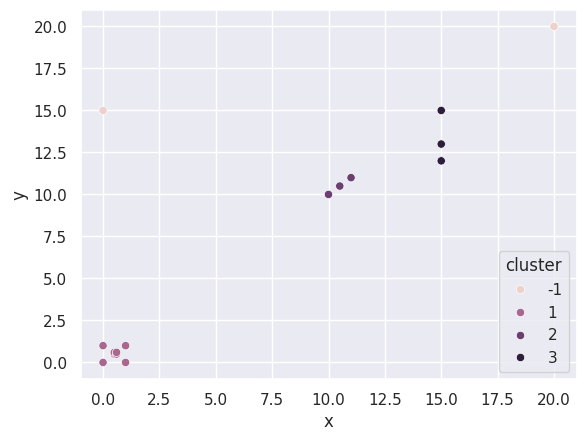

In [234]:
plot_clusters(x, clusters)

##### TEST WITH SKLEARN

In [235]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [236]:
from sklearn.cluster import DBSCAN as skDBSCAN

dbscan = skDBSCAN(eps=2, min_samples=3)
clusters = dbscan.fit_predict(x)

In [237]:
clusters


array([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  2,  2,  2, -1, -1])

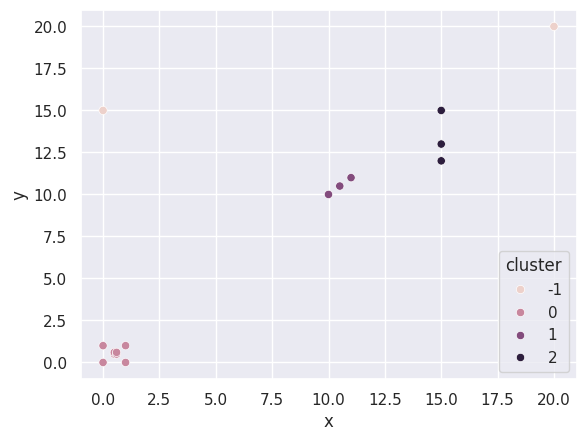

In [238]:
plot_clusters(x, clusters)

#### Random Sample

In [239]:
from sklearn.datasets import make_blobs

In [240]:
X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)

In [241]:
data = pd.DataFrame(X, columns=['x', 'y']).to_numpy()

In [242]:
data

array([[-7.72642091, -8.39495682],
       [ 5.45339605,  0.74230537],
       [-2.97867201,  9.55684617],
       [ 6.04267315,  0.57131862],
       [-6.52183983, -6.31932507],
       [ 3.64934251,  1.40687195],
       [-2.17793419,  9.98983126],
       [ 4.42020695,  2.33028226],
       [ 4.73695639,  2.94181467],
       [-3.6601912 ,  9.38998415],
       [-3.05358035,  9.12520872],
       [-6.65216726, -5.57296684],
       [-6.35768563, -6.58312492],
       [-3.6155326 ,  7.8180795 ],
       [-1.77073104,  9.18565441],
       [-7.95051969, -6.39763718],
       [-6.60293639, -6.05292634],
       [-2.58120774, 10.01781903],
       [-7.76348463, -6.72638449],
       [-6.40638957, -6.95293851],
       [-2.97261532,  8.54855637],
       [-6.9567289 , -6.53895762],
       [-7.32614214, -6.0237108 ],
       [-2.14780202, 10.55232269],
       [-2.54502366, 10.57892978],
       [-2.96983639, 10.07140835],
       [ 3.22450809,  1.55252436],
       [-6.25395984, -7.73726715],
       [-7.85430886,

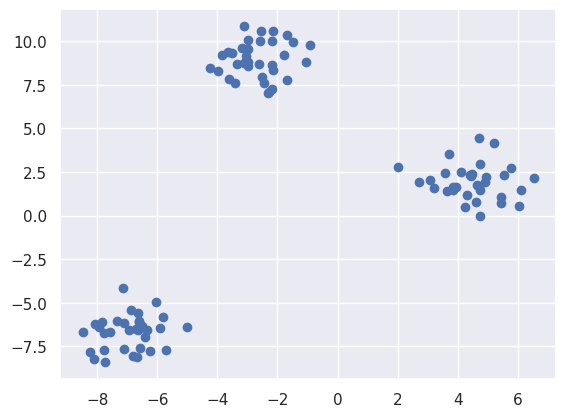

In [243]:
plot_data(data)

##### My own DBSCAN

In [252]:
dbscan = DBSCAN(data, eps=0.5, min_samples=5)
labels = dbscan.fit()

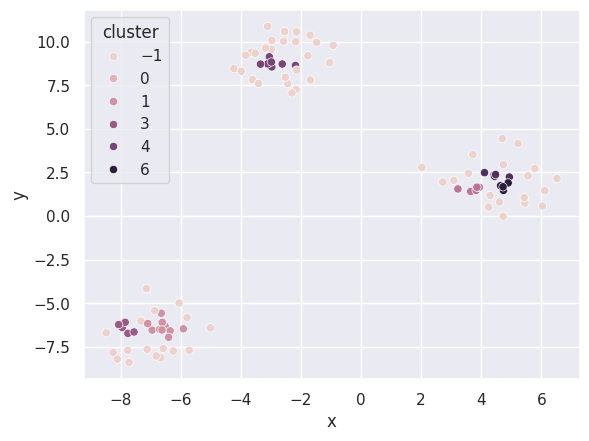

In [253]:
plot_clusters(data, labels)

##### SKLEARN

In [255]:
# Using sklearn
dbscan = skDBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(data)

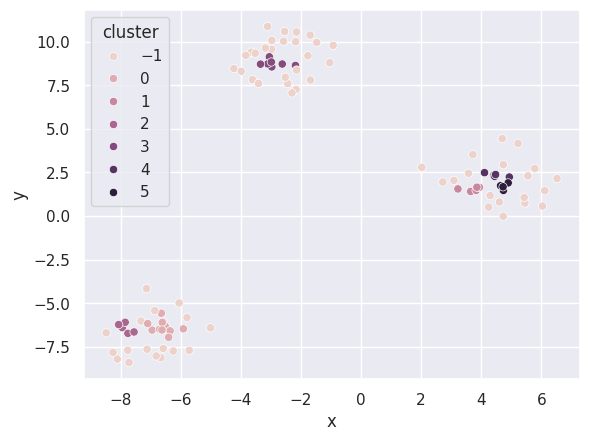

In [256]:
plot_clusters(data, labels)